In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from matplotlib import font_manager, rc

In [2]:
print("==========================")
print("=          실습 #1       =")
print("==========================")

x_lin = np.linspace(-10, 10, 1000)

def sigmoid(linear_equation):
    return 1 / (1 + np.exp(-linear_equation))

=          실습 #1       =


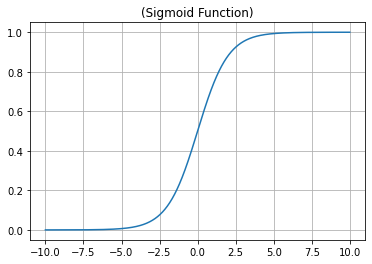

In [3]:
x_lin_sigmoid = sigmoid(x_lin)

plt.title("(Sigmoid Function)")
plt.plot(x_lin, x_lin_sigmoid)
plt.grid(True)

In [4]:
# 한글 폰트 설정
#malgunbd.ttf
font_path = "C:\Windows\Fonts\malgunbd.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rc('axes', unicode_minus=False)

In [5]:
print("==========================")
print("=          실습 #2       =")
print("==========================")

# 데이터 셋 읽어들입니다.
dataFrame = pd.read_csv("binary_data_insect.csv")
print("데이터셋:\n",dataFrame)

data = dataFrame.to_numpy()
female = np.array([x for x in data if x[1] == 0]).T
male = np.array([x for x in data if x[1] == 1]).T

=          실습 #2       =
데이터셋:
    Weight  Gender
0      26       0
1      28       0
2      35       0
3      42       0
4      51       0
5      46       1
6      54       1
7      69       1
8      76       1
9      82       1


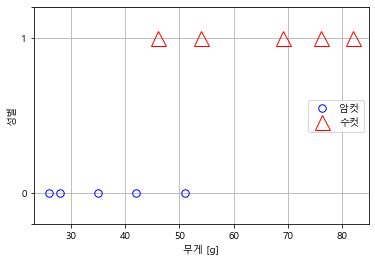

In [6]:
plt.plot(female[0], female[1], 'b.', mfc='none', markersize=15, label="암컷")
plt.plot(male[0], male[1], 'r^', mfc='none', markersize=15, label="수컷")
plt.legend(loc="center right")
plt.yticks([-0.2,0,1, 1.2],[None,0,1,None])
plt.xlabel("무게 [g]")
plt.ylabel("성별")
plt.grid()
plt.show()

In [7]:
print("==========================")
print("=          실습 #3       =")
print("==========================")

gender_N = len(data)        # 데이터 갯수
gender_M = len(data[0]) - 1 # 특성 갯수 = 레이블 (1) + 특성(1) - 레이블(1)
gender_M_b = gender_M + 1          # bias 추가한 값

gender_THRESHOLD = 0.5

log_error = 1e-8

def probability_func(y):
    return list(map(int, y > gender_THRESHOLD))

def cross_entropy_loss(pb, y): # 사후확률, 예측값
    N = len(y)
    # pb = np.array(list(map(lambda x: x if x != 1 else 1-log_error, pb)))
    # print(pb)
    for i in range(N):
        if pb[i] == 1: # np.log(1-pb) 예외처리
            pb[i] -= log_error
        elif pb[i] == 0: # np.log(pb) 예외처리
            pb[i] += log_error
    cee = sum(y * np.log(pb) + (1-y)*np.log(1-pb)) 
    return -cee / N

=          실습 #3       =


In [8]:
# 경사하강법

# 초기 값
LEARNING_RATE = 0.003
N_ITER = 200000

# 특성과 레이블 분리
gender_x = dataFrame["Weight"]
gender_y = dataFrame["Gender"]

np.random.seed(85) # 이후 모든 출력 값을 동일하게 하기 위해 rand값 고정
gd_theta = np.random.randn(gender_M_b,) # 평균 0 표준편차 1인 정규분포따르는 -1~1사이값 가져옴
# gd_theta = np.array([2, 1])
print("임의의 초기 theta값 : \n\tWeight GD = {}, \n\tBias GD = {}) ".format(gd_theta[0], gd_theta[1]))
print("초기 learning rate : ",LEARNING_RATE)
print("초기 반복 값 : ", N_ITER)

임의의 초기 theta값 : 
	Weight GD = 0.1768507210788626, 
	Bias GD = 2.3777541249700573) 
초기 learning rate :  0.003
초기 반복 값 :  200000


In [39]:
    zn = x_b.dot(th) # linear equation
    probability = sigmoid(zn) # 0~1사이로 변경
    y_hat = probability_func(probability) # Corss Entropy Loss
    accuracy = find_accuracy(y_hat, y) 

float

In [40]:
gender_x_b = np.c_[gender_x, np.ones(gender_N)]
zn = gender_x_b.dot(gd_theta) # linear equation
probability = sigmoid(zn) # after probability
y_hat = probability_func(probability)

c_r = cross_entropy_loss(probability, gender_y) # state probability
print("선형 조합   :", zn)
print("로지스틱 후 :", probability)
print("결과 값     :", y_hat)
print("CEE         :", c_r)
type(c_r)

선형 조합   : [ 6.97587287  7.32957432  8.56752936  9.80548441 11.3971409  10.51288729
 11.92769306 14.58045388 15.81840893 16.87951325]
로지스틱 후 : [0.99906672 0.99934458 0.99980985 0.99994485 0.99998877 0.99997282
 0.9999934  0.99999953 0.99999987 0.99999995]
결과 값     : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
CEE         : 4.407748218704554


float

In [10]:
def find_accuracy(y_hat, y):
    count=0
    n = len(y)
    for i in range(n):
        if y[i] == y_hat[i]:
            count += 1
    return count / n

In [11]:
GENDER_COLOR_NUM = 3
COLOR_DATA = "0123456789ABCDEF"

def make_color():
    # '#' + COLOR_DATA에서 6개를 랜덤으로 선택하여 값을 가져온다.
    return '#'+ ''.join([random.choice(COLOR_DATA) for _ in range(6)])
    
# gender_color_list = [make_color() for i in range(GENDER_COLOR_NUM)]
gender_color_list = ["#FF0000", "#0000FF", "#000000"]

In [12]:
GD_RESULT_MAP = {
    "accuracy" : 0,
    "weight" : 1,
    "cee" : 2,
    "epoch" : 3
}

tolerance = 0.000001
# 오차 계산 함수
def isStop(now_th, before_th):
    # 현재 theta와 befoe theta값에 절대값 사용하여
    # 각각의 차이 중 큰 값이 오차 허용 값보다 작을 때 참을 반환
    th_abs = np.abs(now_th) 
    before_th_abs = np.abs(before_th)
    result = (abs(th_abs - before_th_abs).max() < tolerance)
    return result

def theta_gradient_descent(x_b, y, M_b, lr=LEARNING_RATE, epoch=N_ITER, th=gd_theta):
    N = len(y)
    print(N)
    th = th.copy()
    stop_iter = 0

    th_list = []
    cee_list = []
    accuracy_list = []
    for i in range(epoch):
        before_th = th

        # y_hat = probability_func(probability)
        #cross_entropy_loss(probability, y_hat)
        
        zn = x_b.dot(th) # linear equation
        probability = sigmoid(zn)
        # print(probability - y)
        # print(zn, probability)
        cee = cross_entropy_loss(probability, y)
        
        y_hat = probability_func(probability)
        
        # p = 1 + wx
        for j in range(M_b):
            discent = lr * 1/ N *sum((probability-y)*x_b.T[j])
            th[j] = th[j] - discent
        
        th_list.append(th.copy())
        cee_list.append(cee)
        accuracy_list.append(find_accuracy(y_hat, y) )
        
        # 가중치 값 비교를 하여 오차 범위보다 적은지 확인하는 함수 호출
        # if isStop(th, before_th):
        #     # 오차 범위보다 적다면 멈추고 해당 횟수 저장
        #     stop_iter = i+1
        #     break

    if stop_iter == 0:
        stop_iter =  epoch

    epoch_list  = [i for i in range(stop_iter)]

    th_list = np.array(th_list).T

    plt.figure(figsize=(15,15))
    plt.subplot(131)
    for i in range(len(th_list)):
        plt.plot(epoch_list, th_list[i], '-', color=gender_color_list[i])
    plt.xlabel("Epoch")
    plt.ylabel("weight")
    plt.xlim(0, epoch)
    y_lim = [-6,1] if N==10 else [-4,4]
    plt.ylim(y_lim)
    plt.grid()
    
    plt.subplot(132)
    plt.plot(epoch_list, cee_list, 'g-')
    plt.xlabel("Epoch")
    plt.ylabel("CEE")
    y_lim = [0,1] if N==10 else [0,6]
    plt.ylim(y_lim)
    plt.grid()

    
    plt.subplot(133)
    plt.plot(epoch_list, accuracy_list, 'b-', marker='o', markersize=5)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()
    
    return accuracy_list[-1], th, cee_list[-1], epoch

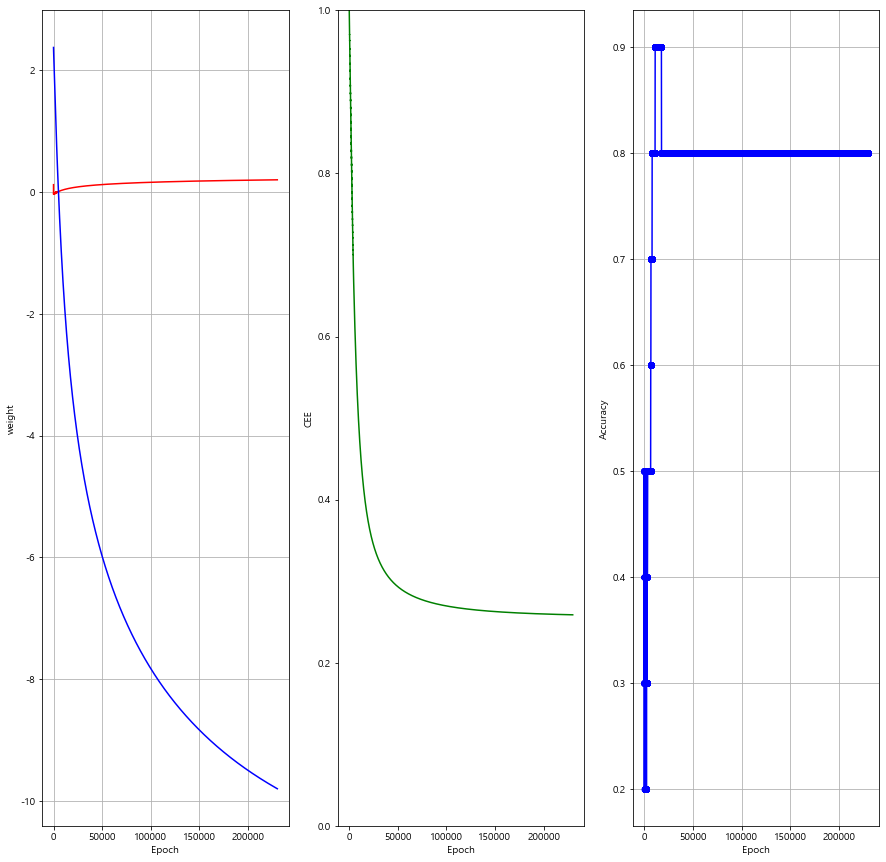

epoch : 230000 ===========> W : [0.20206657257511337 -9.80114969832562], cee : 0.25875997896012237


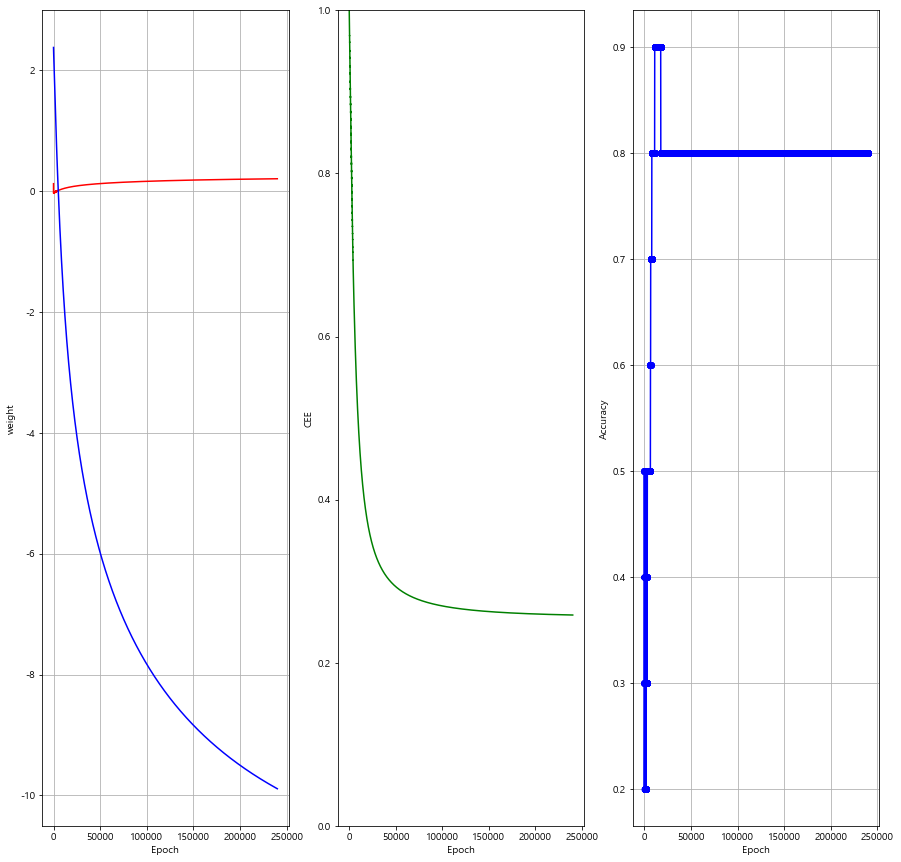

epoch : 240000 ===========> W : [0.20388094590015685 -9.889291741186659], cee : 0.2585008190925392
GD 종료
w1(feature) = -9.889291741186659, w0(bias) = 0.20388094590015685


In [79]:
gd_result1 = theta_gradient_descent(gender_x_b, gender_y, gender_M_b, epoch=230000)
print("epoch : {} ===========> W : [{} {}], cee : {}".format(gd_result1[GD_RESULT_MAP["epoch"]], gd_result1[GD_RESULT_MAP["weight"]][0], gd_result1[GD_RESULT_MAP["weight"]][1], gd_result1[GD_RESULT_MAP["cee"]]))
gd_result2 = theta_gradient_descent(gender_x_b, gender_y, gender_M_b, epoch=240000)
print("epoch : {} ===========> W : [{} {}], cee : {}".format(gd_result2[GD_RESULT_MAP["epoch"]], gd_result2[GD_RESULT_MAP["weight"]][0], gd_result2[GD_RESULT_MAP["weight"]][1], gd_result2[GD_RESULT_MAP["cee"]]))

most_gd_result = gd_result1 \
                if gd_result1[GD_RESULT_MAP["cee"]] < gd_result2[GD_RESULT_MAP["cee"]]else \
             gd_result2
print("GD 종료\nw0(feature) = {}, w1(bias) = {}".format(most_gd_result[GD_RESULT_MAP["weight"]][0], most_gd_result[GD_RESULT_MAP["weight"]][1]))

In [13]:
# weight(x) * w0 + bias(1) * w1
x_lin = np.linspace(min(gender_x), max(gender_x),1000)
dicision_boundary = most_gd_result[GD_RESULT_MAP["weight"]][0] * x_lin +  most_gd_result[GD_RESULT_MAP["weight"]][1]


NameError: name 'most_gd_result' is not defined

In [14]:
print("훈련결과, 정확도 {}%\nw0(feature) = {}, w1(bias) = {}".format( \
                                                             most_gd_result[GD_RESULT_MAP["accuracy"]] * 100,\
                                                             most_gd_result[GD_RESULT_MAP["weight"]][0], \
                                                             most_gd_result[GD_RESULT_MAP["weight"]][1]))
plt.scatter(gender_x, gender_y)
plt.plot(x_lin, dicision_boundary, 'b-')
plt.ylim(-0.2,1.22)
plt.grid()
plt.show()

NameError: name 'most_gd_result' is not defined

In [19]:
RESULT_GENDER = ["female", "male"]

def predict(data, weight):
    # weight = bias + 특성(1) | 2 X 1 matrix
    w = np.array(weight)
    # data = 데이터 갯수 X 1(feature) martrix
    d = np.array([data]).T
    
    # d = 데이터 갯수 X 2(feature + bias) matrix  
    d_b = np.c_[d, np.ones(len(d))]

    zn = d_b @ w # linear equation
    probability = sigmoid(zn) # sigmoid
    y_pred = probability_func(probability) # Threshold = 0.5

    for i in range(len(y_pred)):
        print("데이터 [{}]의 예측 결과 : Probability={},Result={}".format(d[i], probability[i], RESULT_GENDER[y_pred[i]]))
predict([48,50,60], most_gd_result[GD_RESULT_MAP["weight"]])

NameError: name 'most_gd_result' is not defined

In [16]:
np.array([10,20])

array([10, 20])

In [20]:
print("==========================")
print("=        실습 9주차       =")
print("==========================")
iris_data = pd.read_csv("iris.csv")
print(iris_data)
print(iris_data.dtypes)

iris_df_feature = iris_data.iloc[:,:2].to_numpy()
iris_df_label = iris_data.iloc[:,-1].to_numpy()

=        실습 9주차       =
    sepal_length  petal_length     variety
0            5.1           1.4      Setosa
1            4.9           1.4      Setosa
2            4.7           1.3      Setosa
3            4.6           1.5      Setosa
4            5.0           1.4      Setosa
..           ...           ...         ...
95           5.7           4.2  Versicolor
96           5.7           4.2  Versicolor
97           6.2           4.3  Versicolor
98           5.1           3.0  Versicolor
99           5.7           4.1  Versicolor

[100 rows x 3 columns]
sepal_length    float64
petal_length    float64
variety          object
dtype: object


In [21]:
iris_feature = iris_df_feature.T
iris_label = iris_df_label.T

LABEL_NAME = {
    "Setosa" : 0,
    "Versicolor" : 1
}

# x : Setosa, Versicolor
# LABEL_NAME["Setosa"] = 0, lABEL_NAME["Versicolor"] = 1
iris_label = np.array(list((map(lambda x : LABEL_NAME[x], iris_label))))

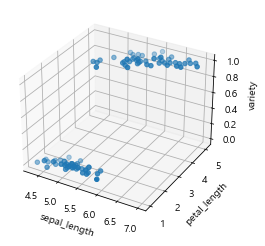

In [22]:
FEATURE_NAME = {
    "sepal_length" : 0,
    "petal_length" : 1
}

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(iris_feature[FEATURE_NAME["sepal_length"]], iris_feature[FEATURE_NAME["petal_length"]], iris_label)
ax.set_xlabel("sepal_length"); ax.set_ylabel("petal_length"); ax.set_zlabel("variety", rotation=0)
plt.show()

In [23]:
# 경사하강법

# 초기 값
IRIS_LEARNING_RATE = 0.0005
IRIS_N_ITER = 20000

iris_M = len(iris_feature)
iris_M_b = iris_M+1

np.random.seed(85) # 이후 모든 출력 값을 동일하게 하기 위해 rand값 고정
iris_gd_theta = np.array([random.uniform(-3,3) for _ in range(iris_M_b)])
iris_gd_theta = np.array([-1.5, -0.5, -1.1])
print("임의의 초기 theta값 : \n\tbias GD = {}, \n\tsepal_length GD = {}\n\tpetal_length GD = {}) ".format(iris_gd_theta[0], iris_gd_theta[1], iris_gd_theta[2]))
print("초기 learning rate : ",IRIS_LEARNING_RATE)
print("초기 반복 값 : ", IRIS_N_ITER)

임의의 초기 theta값 : 
	bias GD = -1.5, 
	sepal_length GD = -0.5
	petal_length GD = -1.1) 
초기 learning rate :  0.0005
초기 반복 값 :  20000


In [24]:
iris_color_list = ["#FF0000", "#0000FF", "#000000"]

In [25]:
iris_x_b = np.c_[iris_df_feature, np.ones(len(iris_df_label))]

100


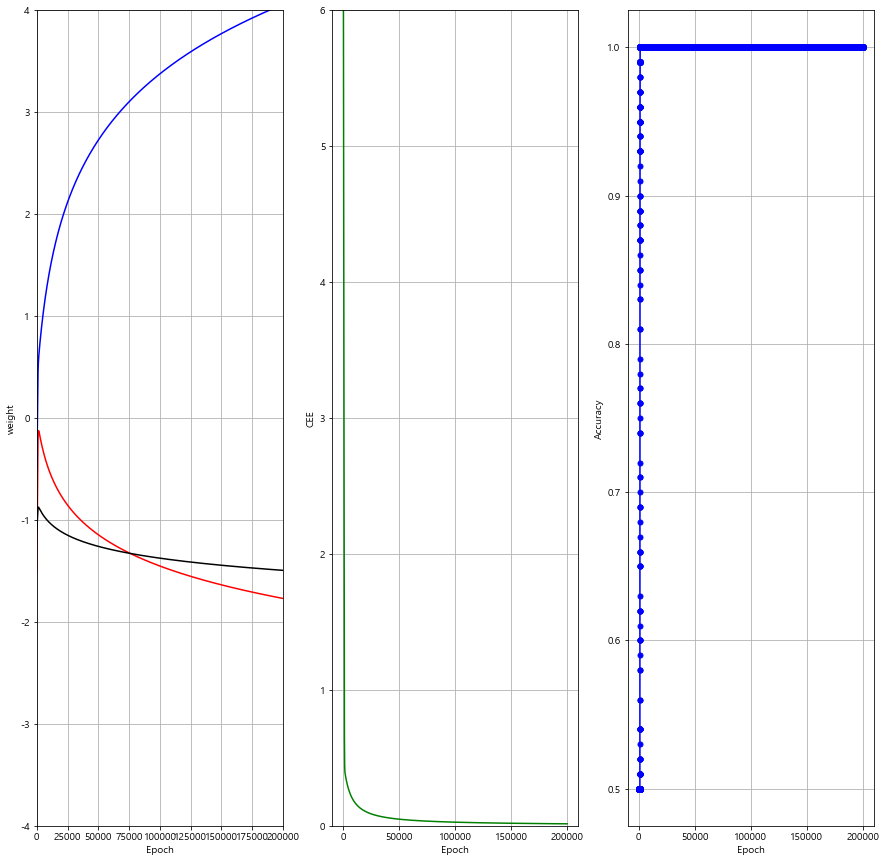

(1.0,
 array([-1.76940124,  4.0587161 , -1.49375726]),
 0.014557005058576655,
 200000)

In [60]:
iris_result = theta_gradient_descent(iris_x_b, iris_label, iris_M_b, th=iris_gd_theta, lr=IRIS_LEARNING_RATE, epoch=200000)
iris_result

In [30]:
print("훈련결과, 정확도 {}%\nw0(sepal) = {}, w1(petal) = {}, w2(bias) = {}".format( \
                                                             iris_result[GD_RESULT_MAP["accuracy"]] * 100,\
                                                             iris_result[GD_RESULT_MAP["weight"]][0], \
                                                             iris_result[GD_RESULT_MAP["weight"]][1], \
                                                             iris_result[GD_RESULT_MAP["weight"]][2]))

훈련결과, 정확도 100.0%
w0(sepal) = -0.7656701488556424, w1(petal) = 1.9353109446459722, w2(bias) = -1.115772735353463


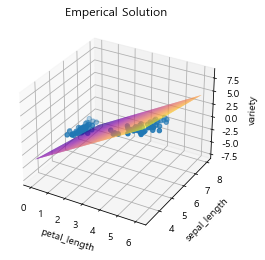

In [38]:
def origin_data_space(weight):
    petal_min = (min(iris_feature[FEATURE_NAME["petal_length"]]))
    petal_max = (max(iris_feature[FEATURE_NAME["petal_length"]]))
    petal_lim = [petal_min-1 ,petal_max +1]

    sepal_min = (min(iris_feature[FEATURE_NAME["sepal_length"]]))
    sepal_max = (max(iris_feature[FEATURE_NAME["sepal_length"]]))
    sepal_lim = [sepal_min-1, sepal_max +1]
    
    petal_space = np.linspace(petal_lim[0], petal_lim[1], 1000)
    sepal_space = np.linspace(sepal_lim[0], sepal_lim[1], 1000)

    petal_mesh, sepal_mesh = np.meshgrid(petal_space, sepal_space)
    y_space = sepal_mesh * weight[0] + petal_mesh * weight[1] + weight[2]

    
    ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(iris_feature[FEATURE_NAME["petal_length"]], iris_feature[FEATURE_NAME["sepal_length"]], iris_label)
    ax.set_ylabel("sepal_length"); ax.set_xlabel("petal_length"); ax.set_zlabel("variety", rotation=0)
    ax.plot_surface(petal_mesh, sepal_mesh, y_space, cmap="plasma")
    plt.title("Emperical Solution")
    plt.grid(True)
    plt.show()
    
origin_data_space(iris_result[GD_RESULT_MAP["weight"]])

In [58]:
RESULT_IRIS = ["Setosa", "Versicolor"]

def predict_iris(data, weight):
    """
    Args:
        data (List or number(int or float)): 예측을 원하는 값
        weight (np.array): 최적화된 가중치
    """
    # weight = bias + 특성(1) | 3 X 1 matrix
    w = np.array(weight)
    # data = 데이터 갯수 X 1(feature) martrix
    d = np.asarray(data)

    # d = 데이터 갯수 X 2(feature + bias) matrix  
    d_b = np.c_[d, np.ones(len(d))]
    zn = d_b @ w # linear equation
    probability = sigmoid(zn) # sigmoid
    y_pred = probability_func(probability) # Threshold = 0.5

    for i in range(len(y_pred)):
        print("데이터 {}의 예측 결과 : Result={}".format(d[i], RESULT_IRIS[y_pred[i]]))

predict_iris([[5.7,0.2],[6.4,4]], iris_result[GD_RESULT_MAP["weight"]])

데이터 [5.7 0.2]의 예측 결과 : Result=Setosa
데이터 [6.4 4. ]의 예측 결과 : Result=Versicolor
